In [195]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

In [196]:
def countScales(imgName, blockSize, openingNum=2):   
    img = cv2.imread(imgName)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # blur and adaptive thresholding
    # source: https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
    blur = cv2.GaussianBlur(gray,(5,5),0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, -2)

    # Remove noise by opening
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations=openingNum)
    
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform, 1.5, 255, 0)
    sure_fg = np.uint8(sure_fg)

    # Label and count
    # source: https://medium.com/analytics-vidhya/images-processing-segmentation-and-objects-counting-in-an-image-with-python-and-opencv-216cd38aca8e
    count, labels = cv2.connectedComponents(sure_fg)
    count = count - 1 # background doesn't count as a scale
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    
    plt.subplot(1, 4, 1), plt.imshow(gray, 'gray')
    plt.title(imgName[12:])
    plt.subplot(1, 4, 2), plt.imshow(thresh, 'gray')
    plt.title('Binary threshold')
    plt.subplot(1, 4, 3), plt.imshow(opening, 'gray')
    plt.title('Opening')
    plt.subplot(1, 4, 4), plt.imshow(labeled_img, 'gray')
    plt.title('Count: ' + str(count) + ' scales')
    plt.show()
    
    return count

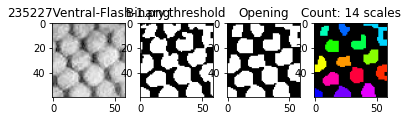

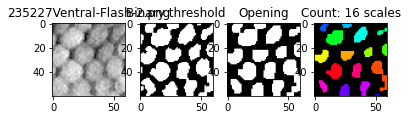

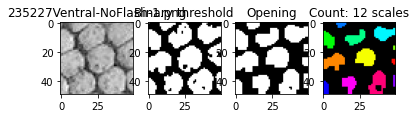

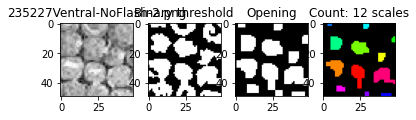

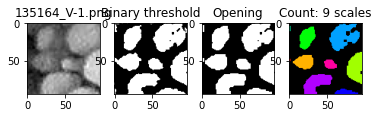

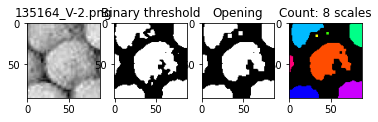

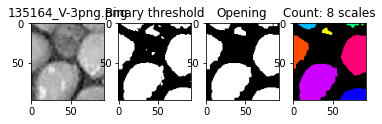

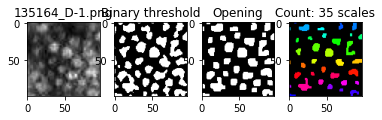

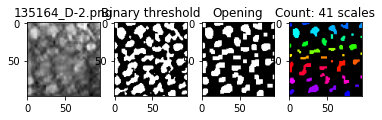

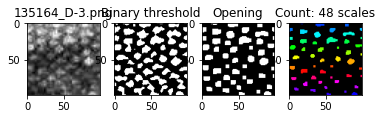

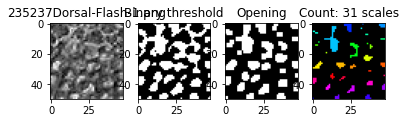

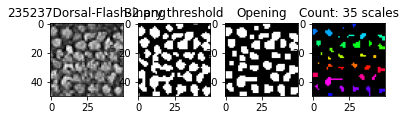

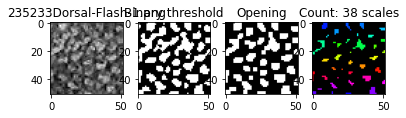

38

In [206]:
# Blocksize must be an odd number
countScales('More_images/235227Ventral-Flash-1.png', 15)
countScales('More_images/235227Ventral-Flash-2.png', 15)

countScales('More_images/235227Ventral-NoFlash-1.png', 15)
countScales('More_images/235227Ventral-NoFlash-2.png', 15)

countScales('More_images/135164_V-1.png', 35)
countScales('More_images/135164_V-2.png', 65)
countScales('More_images/135164_V-3png.png', 65)

countScales('More_images/135164_D-1.png', 15)
countScales('More_images/135164_D-2.png', 15)
countScales('More_images/135164_D-3.png', 15)

countScales('More_images/235237Dorsal-Flash-1.png', 15, 1)
countScales('More_images/235237Dorsal-Flash-2.png', 15, 1)

countScales('More_images/235233Dorsal-Flash-1.png', 15, 1)

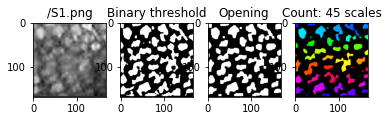

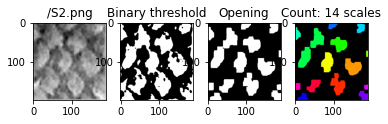

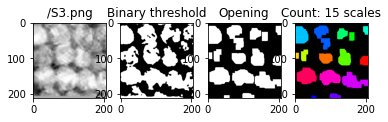

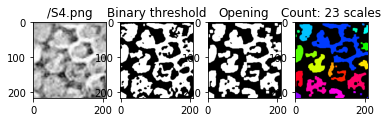

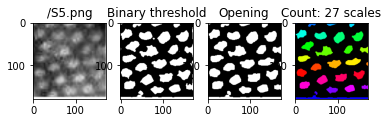

27

In [199]:
countScales('Scale_images/S1.png', 25)
countScales('Scale_images/S2.png', 105, 5)
countScales('Scale_images/S3.png', 65, 7)
countScales('Scale_images/S4.png', 65, 3)
countScales('Scale_images/S5.png', 35)